In [1]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import tensorflow as tf
print("hellooooooo",tf.__version__)

import matplotlib.pyplot as plt

from yoloface import face_analysis

hellooooooo 2.10.0


In [11]:
###### img = cv.imread(r"Me.jpg")
# img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(img)
face=face_analysis()        #  Auto Download a large weight files from Google Drive.
                            #  only first time.
                            #  Automatically  create folder .yoloface on cwd.
# example 1
%%time
img, box, conf = face.face_detection(r'Me.jpg', model='tiny')
print(box)
print(conf)
face.show_output(img, box)


yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


UsageError: Line magic function `%%time` not found.


In [19]:
print(box[0])
print(conf)

[398, 209, 655, 469]
[0.9999991655349731]


[[398, 209, 655, 469]]
[0.9999991655349731]


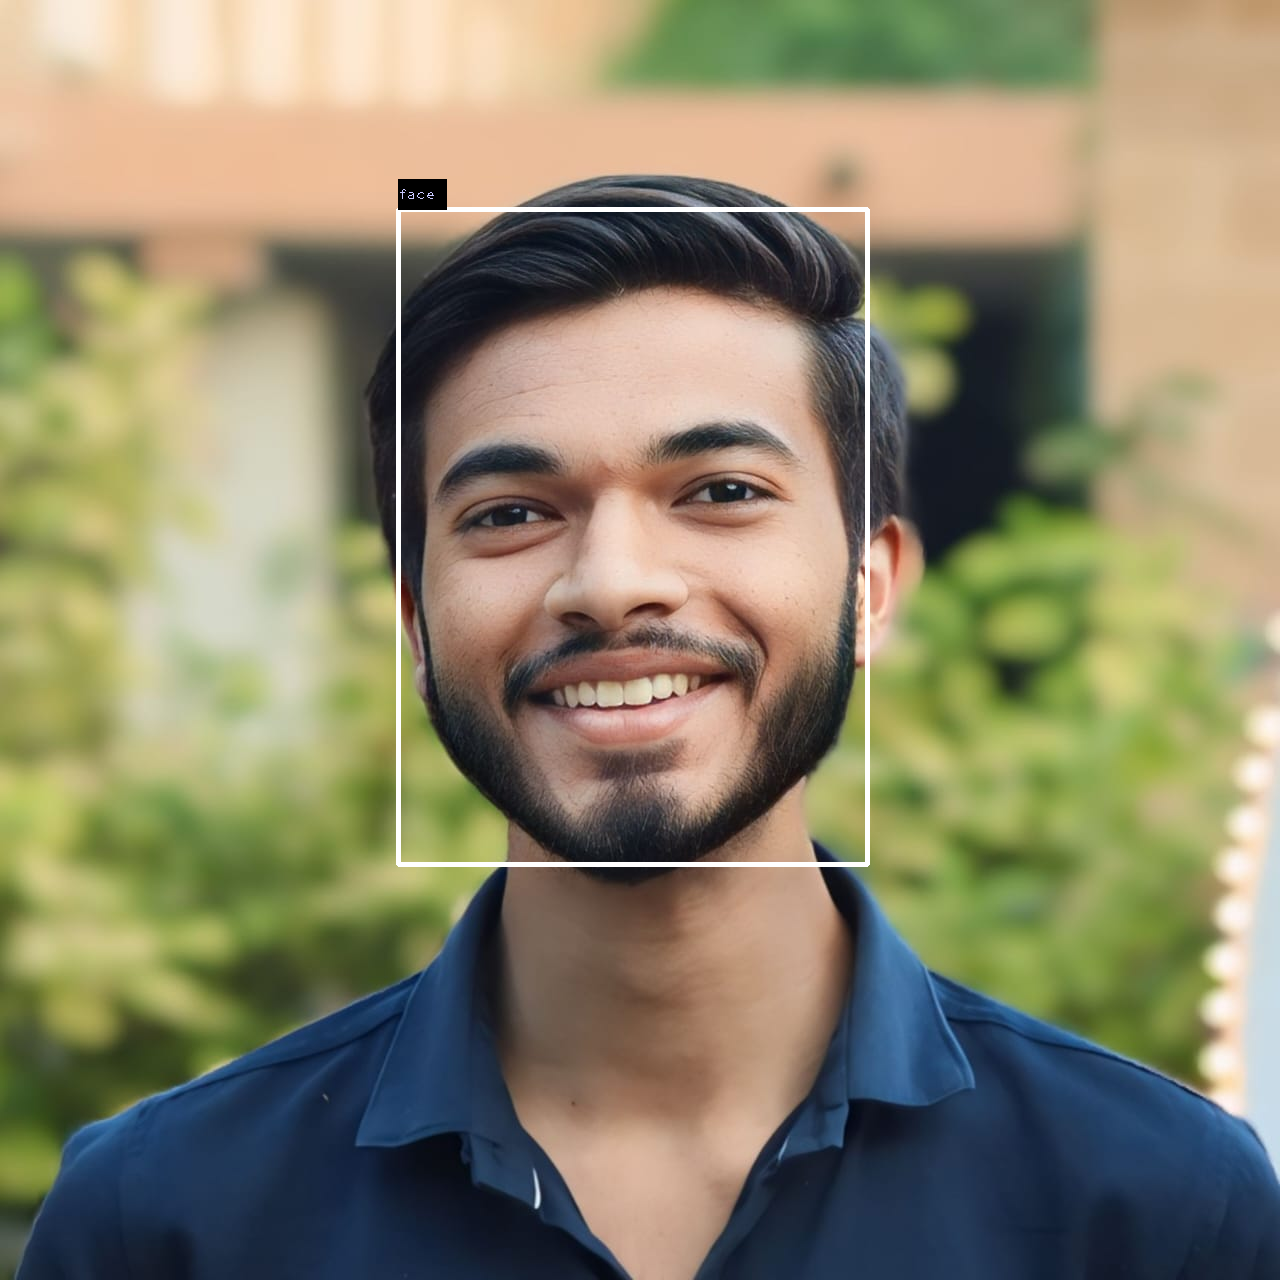

Execution Time: 0.06 seconds


In [30]:
import time

start = time.time()
img, box, conf = face.face_detection(r'Me.jpg', model='tiny')
end = time.time()

print(box)
print(conf)
face.show_output(img, box)
print(f"Execution Time: {end - start:.2f} seconds")


Execution Time: 0.44 seconds


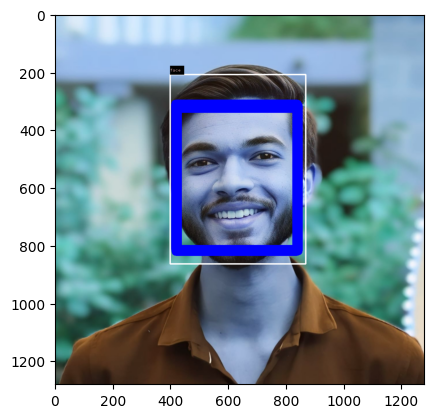

In [29]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
start = time.time()
results = detector.detect_faces(img)
end = time.time()

x,y,w,h = results[0]['box']
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)
print(f"Execution Time: {end - start:.2f} seconds")

In [26]:
results[0]['box']

[417, 311, 421, 503]

In [6]:
x,y,w,h = results[0]['box']

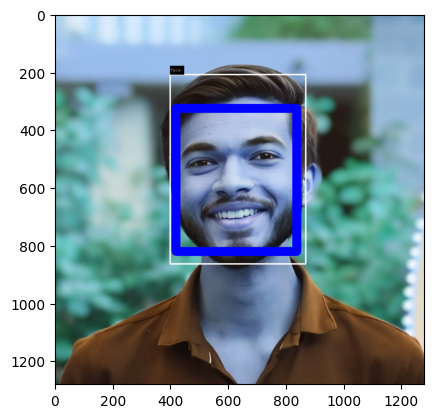

In [31]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)


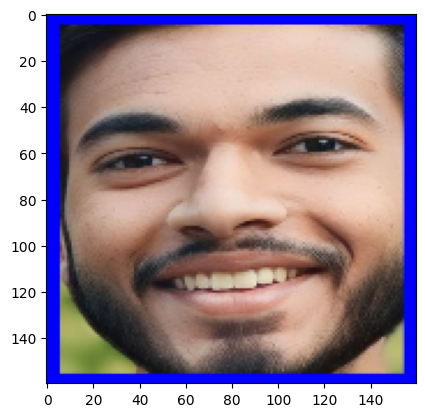

In [8]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [9]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

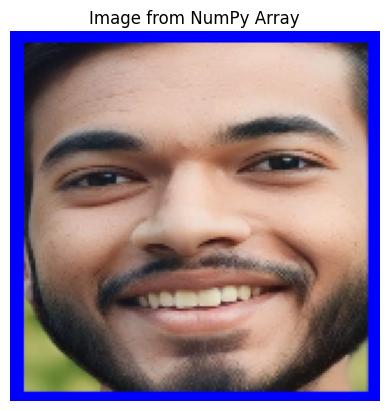

In [10]:
plt.imshow(my_face)
plt.axis('off')  # Hide axis
plt.title("Image from NumPy Array")
plt.show()

In [19]:
import cv2 as cv
import os
import numpy as np
from mtcnn import MTCNN

class Faceloading:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        img = cv.imread(filename)
        if img is None:  # Check if the image was loaded correctly
            print(f"Error loading image: {filename}")
            return None
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        faces = self.detector.detect_faces(img)
        if not faces:
            print(f"No faces detected in image: {filename}")
            return None
        x, y, w, h = faces[0]['box']
        x, y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir, im_name)  # Correct path handling
                single_face = self.extract_face(path)
                if single_face is not None:  # Only append valid faces
                    FACES.append(single_face)
            except Exception as e:
                print(f"Error processing {im_name}: {e}")
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)  # Correct path handling
            if os.path.isdir(path):
                FACES = self.load_faces(path)
                labels = [sub_dir for _ in range(len(FACES))]
                print(f"Loaded successfully: {len(labels)}")
                self.X.extend(FACES)
                self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)

# Test the class



In [20]:
faceloading = Faceloading(r"data")
X, Y = faceloading.load_classes()

Loaded successfully: 100
Loaded successfully: 9
No faces detected in image: data\parn\41.jpg
No faces detected in image: data\parn\55.jpg
No faces detected in image: data\parn\65.jpg
No faces detected in image: data\parn\66.jpg
No faces detected in image: data\parn\80.jpg
No faces detected in image: data\parn\81.jpg
No faces detected in image: data\parn\82.jpg
No faces detected in image: data\parn\83.jpg
Loaded successfully: 92


In [13]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

NameError: name 'X' is not defined

<Figure size 1600x1200 with 0 Axes>

In [14]:
from keras_facenet import FaceNet
embedder = FaceNet()
def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [15]:
embedding = get_embedding(my_face)
print(embedding)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[-2.78885453e-03  3.21967527e-02 -1.85285718e-03 -2.02001422e-04
  1.16680330e-02 -1.16311470e-02  7.21034035e-02 -3.36228637e-03
  2.26557385e-02 -5.70119172e-03  3.84371281e-02 -1.34564163e-02
 -1.20261861e-02  2.98333913e-02  4.26720083e-02 -3.94235104e-02
 -1.86852310e-02  1.21930167e-02 -7.51048997e-02  7.37762963e-03
  2.64475457e-02  7.58707970e-02  6.25528544e-02 -1.68704428e-02
 -1.31056774e-02  8.62853229e-02 -4.93589826e-02 -8.04893002e-02
  1.84900202e-02 -8.37611035e-02 -4.86030690e-02  1.13462031e-01
  1.62040032e-02 -1.96696203e-02  3.49528715e-02  8.98714885e-02
  1.84632521e-02 -5.04659452e-02  1.02305841e-02  3.24687362e-03
  3.73116359e-02 -7.54555035e-03 -5.15478030e-02 -5.25271595e-02
 -8.33043605e-02 -4.82027046e-02  1.45706465e-03  1.03187799e-01
 -5.96915931e-02 -1.98774245e-02 -3.12964581e-02 -5.90169095e-02
 -1.88331176e-02  4.19942604e-04  2.13213842e-02 -1.10795870e-02
 -2.56590825e-03 -1.24366032e-02 -9.91744548e-03 -4.07

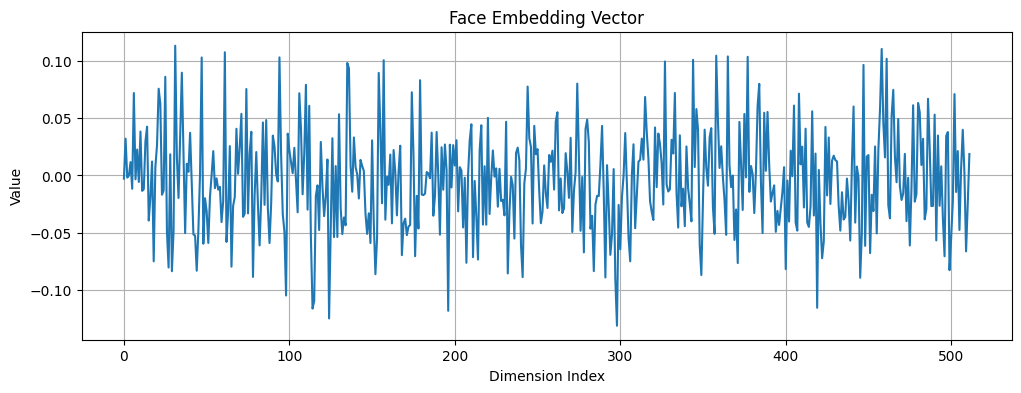

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(embedding)
plt.title("Face Embedding Vector")
plt.xlabel("Dimension Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [16]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] 

In [17]:
len(X)

110

In [18]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━

In [1]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

NameError: name 'np' is not defined

In [ ]:
import os
import numpy as np
import faiss
import pickle

EMBEDDING_DIR = "embeddings"
INDEX_FILE = "faiss_index/index.bin"
LABELS_FILE = "faiss_index/labels.pkl"

os.makedirs("faiss_index", exist_ok=True)

def load_embeddings():
    embeddings = []
    labels = []

    for file in os.listdir(EMBEDDING_DIR):
        if file.endswith(".npy"):
            vector = np.load(os.path.join(EMBEDDING_DIR, file))
            embeddings.append(vector[0])
            labels.append(file.replace(".npy", ""))  # You can map this to names later

    return np.array(embeddings).astype('float32'), labels

def build_faiss_index():
    vectors, labels = load_embeddings()
    d = vectors.shape[1]  # 128 for FaceNet

    index = faiss.IndexFlatL2(d)  # You can also use IndexFlatIP for cosine similarity
    index.add(vectors)

    faiss.write_index(index, INDEX_FILE)
    with open(LABELS_FILE, 'wb') as f:
        pickle.dump(labels, f)

    print(f"[✓] FAISS index built with {len(labels)} faces")

if __name__ == "__main__":
    build_faiss_index()


In [ ]:
import cv2
import torch
import faiss
import pickle
import numpy as np
from PIL import Image
from ultralytics import YOLO
from facenet_pytorch import InceptionResnetV1
from torchvision import transforms

# === Load YOLOv8 for face detection ===
yolo_model = YOLO("yolov8n.pt")

# === Load FaceNet model ===
facenet = InceptionResnetV1(pretrained='vggface2').eval()

# === Load FAISS index and labels ===
index = faiss.read_index("faiss_index/index.bin")
with open("faiss_index/labels.pkl", "rb") as f:
    labels = pickle.load(f)

# === Preprocessing for FaceNet ===
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# === Function to get face embedding ===
def get_face_embedding(face):
    face = Image.fromarray(cv2.cvtColor(face, cv2.COLOR_BGR2RGB)).convert("RGB")
    tensor = transform(face).unsqueeze(0)
    with torch.no_grad():
        embedding = facenet(tensor).numpy()
    return embedding.astype("float32")

# === Real-time webcam loop ===
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame)[0]
    for box in results.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box.tolist())
        face = frame[y1:y2, x1:x2]

        try:
            embedding = get_face_embedding(face)
            D, I = index.search(embedding, 1)
            match_label = labels[I[0][0]]
            confidence = round(100 - D[0][0], 2)

            # Draw box + name
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{match_label} ({confidence}%)", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
        except:
            cv2.putText(frame, "Unrecognized", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    cv2.imshow("Google-level Face Recognition 😎", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [36]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [38]:
len(EMBEDDED_X)

110

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [23]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [25]:
accuracy_score(Y_test,ypreds_test)

1.0

In [26]:
t_im = cv.imread(r"Me.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [27]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [28]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [29]:
ypreds

array([1])

In [30]:
encoder.inverse_transform(ypreds)

array(['parn'], dtype='<U4')

In [31]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71m

In [44]:
cap = cv.VideoCapture(0)

print("Press 'q' to quit.")
while True:
    ret, frame = cap.read()
    if not ret:
        break

    rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    faces = detector.detect_faces(rgb_frame)

    for face in faces:
        x, y, w, h = face['box']
        x, y = abs(x), abs(y)
        face_crop = rgb_frame[y:y+h, x:x+w]

        try:
            face_crop = cv.resize(face_crop, (160, 160))
            emb = get_embedding(face_crop)

            # Predict probabilities for all classes
            if hasattr(model, "predict_proba"):
                proba = model.predict_proba([emb])[0]
                best_idx = np.argmax(proba)
                confidence = proba[best_idx]
                predicted_name = encoder.inverse_transform([best_idx])[0]

                # Set threshold for unknown
                threshold = 0.97
                if confidence < threshold:
                    name = f"Unknown ({confidence:.2f})"
                else:
                    name = f"{predicted_name} ({confidence:.2f})"
            else:
                # Fallback if predict_proba is not available
                pred = model.predict([emb])
                name = encoder.inverse_transform(pred)[0]

            # Draw bounding box and label
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv.putText(frame, name, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (36, 255, 12), 2)

        except Exception as e:
            print("Error in face processing:", e)

    cv.imshow('Real-time Face Recognition', frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━

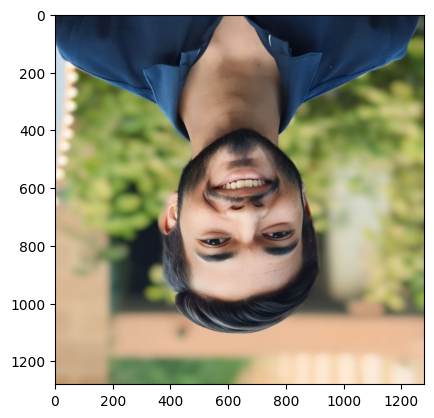

In [15]:
#checking for upside down face
img2 = cv.imread(r'Me2.jpg')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
plt.imshow(img2)

In [18]:
result2= detector.detect_faces(img2)
result2

[{'box': [427, 468, 458, 564],
  'confidence': 0.9974313378334045,
  'keypoints': {'nose': [636, 834],
   'mouth_right': [696, 901],
   'right_eye': [731, 726],
   'left_eye': [565, 722],
   'mouth_left': [556, 897]}}]

In [20]:
x,y,w,h = result2[0]['box']

In [14]:
img = cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img2)


NameError: name 'cv' is not defined

In [54]:
from datetime import datetime ,timedelta

In [56]:
# dictionary data handeling


dur = timedelta() 

timeduration = {'parn': ['2025-04-22 15:51:23', '2025-04-22 15:51:49', '2025-04-22 15:52:02', '2025-04-22 15:52:23', '2025-04-22 15:52:40', '2025-04-22 15:52:54', '2025-04-22 15:53:21'], 'Adivya': ['2025-04-22 15:51:38', '2025-04-22 15:51:52', '2025-04-22 15:52:24', '2025-04-22 15:52:56', '2025-04-22 15:53:22']}
timedir = {}
for key,value in timeduration.items():
    for i in range(0,len(value)-1,2):
        dur=dur+datetime.strptime(value[i+1], "%Y-%m-%d %H:%M:%S") - datetime.strptime(value[i], "%Y-%m-%d %H:%M:%S")
    timedir[key]=dur
    dur = timedelta()


print(timedir)
    
    

{'parn': datetime.timedelta(seconds=61), 'Adivya': datetime.timedelta(seconds=46)}


In [31]:
l = ['2025-04-22 15:51:23', '2025-04-22 15:51:49', '2025-04-22 15:52:02', '2025-04-22 15:52:23', '2025-04-22 15:52:40', '2025-04-22 15:52:54', '2025-04-22 15:53:21']

In [45]:

l_time = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S").time() for ts in l]
l_time

[datetime.time(15, 51, 23),
 datetime.time(15, 51, 49),
 datetime.time(15, 52, 2),
 datetime.time(15, 52, 23),
 datetime.time(15, 52, 40),
 datetime.time(15, 52, 54),
 datetime.time(15, 53, 21)]

In [33]:
diff = datetime.strptime(l[1], "%Y-%m-%d %H:%M:%S") - datetime.strptime(l[0], "%Y-%m-%d %H:%M:%S")
print(str(diff))

0:00:26


In [34]:
for i in l_time:
    print(l_time.index(i))

0
1
2
3
4
5
6


In [7]:
newemployee = {'parn': ['2025-04-24 12:43:07', '2025-04-24 12:43:19', '2025-04-24 12:43:46', '2025-04-24 12:44:27', '2025-04-24 12:44:30', '2025-04-24 12:44:57', '2025-04-24 12:45:17'], 'Adivya': []}

In [9]:
from datetime import datetime

newemployee = {
    'parn': [
        '2025-04-24 12:43:07', '2025-04-24 12:43:19',
        '2025-04-24 12:43:46', '2025-04-24 12:44:27',
        '2025-04-24 12:44:30', '2025-04-24 12:44:57',
        '2025-04-24 12:45:17'
    ],
    'Adivya': []
}

def calculate_total_duration(timestamps):
    total_duration = 0
    for i in range(0, len(timestamps) - 1, 2):  # step by 2
        in_time = datetime.strptime(timestamps[i], "%Y-%m-%d %H:%M:%S")
        out_time = datetime.strptime(timestamps[i+1], "%Y-%m-%d %H:%M:%S")
        total_duration += (out_time - in_time).total_seconds()
    return total_duration

for employee, timestamps in newemployee.items():
    duration_seconds = calculate_total_duration(timestamps)
    duration_minutes = duration_seconds / 60
    print(f"{employee} stayed for {duration_seconds:.0f} seconds ({duration_minutes:.2f} minutes)")
    
# calculate_total_duration(timestamps)

parn stayed for 80 seconds (1.33 minutes)
Adivya stayed for 0 seconds (0.00 minutes)


[[398, 209, 655, 469]]
[0.9999991655349731]


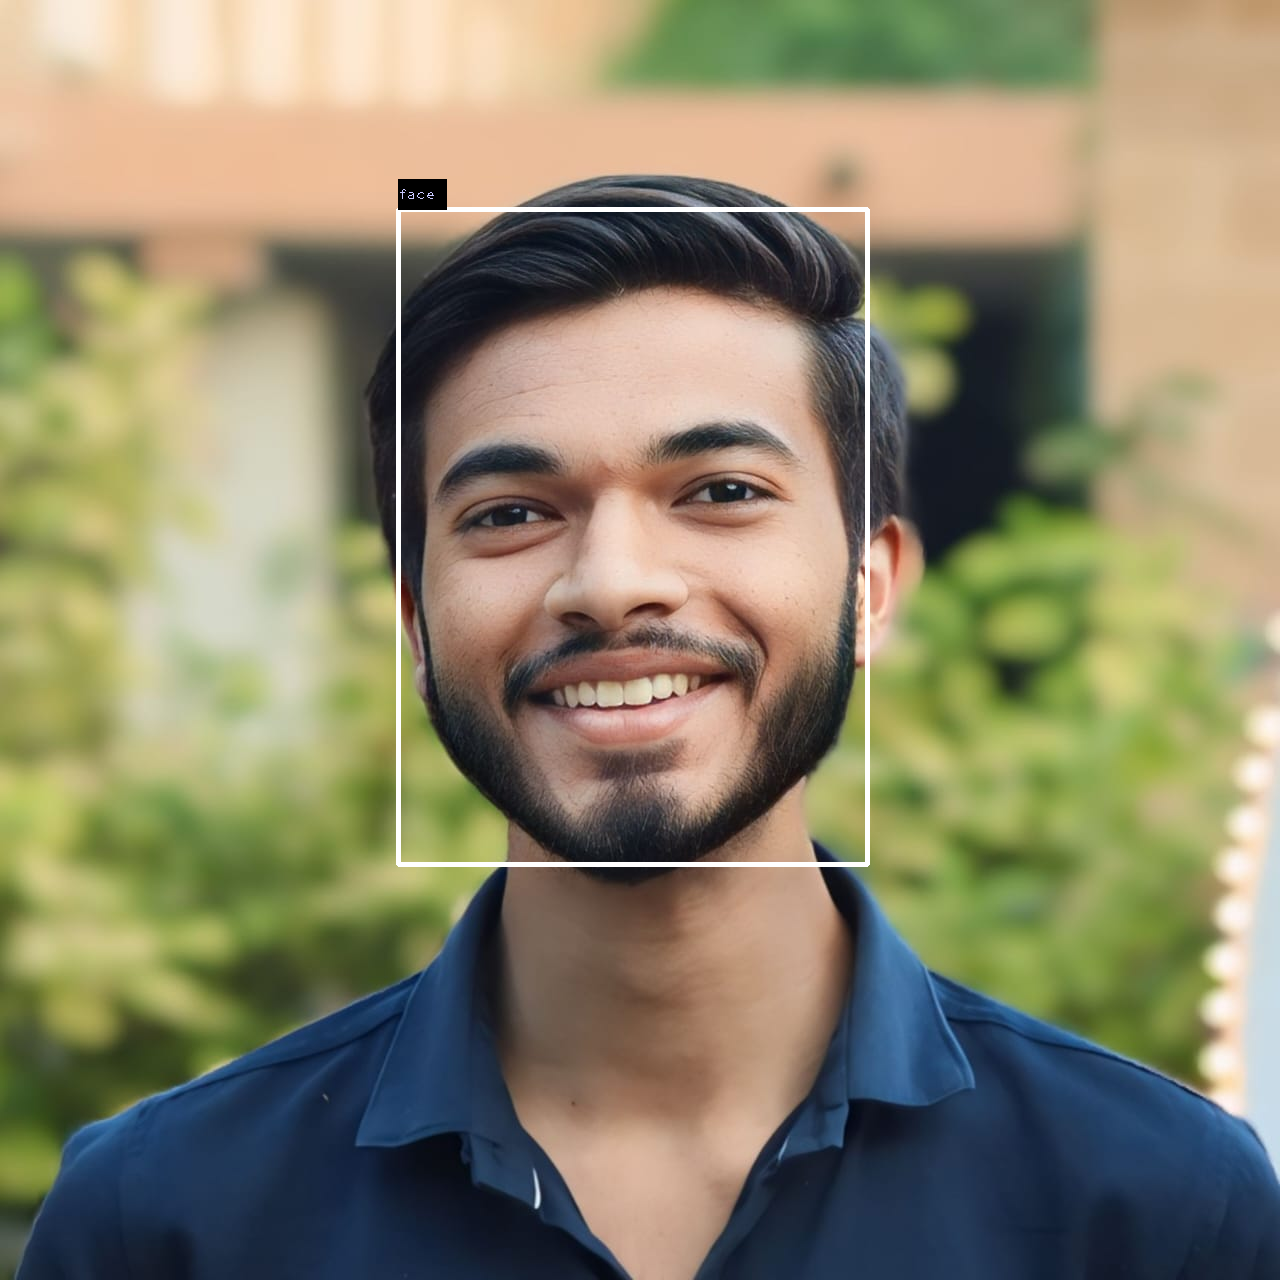

Execution Time: 0.08 seconds


In [24]:
import time

start = time.time()
img, box, conf = face.face_detection(r'Me.jpg', model='tiny')
end = time.time()

print(box)
print(conf)
face.show_output(img, box)
print(f"Execution Time: {end - start:.2f} seconds")


In [2]:
face=face_analysis()                            
img, box, conf = face.face_detection(r'temp.jpg', model='tiny')


yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


In [3]:
import time

start = time.time()
image = cv.imread(r'temp.jpg')
cv.imshow('seds',image)
img, box, conf = face.face_detection(image, model='tiny')
# end = time.time()
# if box:
#     print(box)
#     print(conf)
#     face.show_output(img, box)
#     print(f"Execution Time: {end - start:.2f} seconds")
cv.waitKey(0)
cv.destroyAllWindows()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
import cv2 as cv
import torch
import time

# Load the YOLOv5 model (pre-trained on COCO dataset)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is a small model, choose according to your needs

# Optionally load the model trained specifically for face detection (e.g., a custom YOLO model trained for faces)

start = time.time()

# Open video capture (replace with your camera feed if using RTSP)
cap = cv2.VideoCapture(0)  # 0 for default webcam
# cap = cv.imread(r'temp.jpg')

while True:
    # Read frame from the video feed
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to RGB (YOLO models expect RGB images)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform inference with the YOLO model
    results = model(img_rgb)  # This processes the frame and detects objects
    
    # Extract detections (boxes, labels, and confidence)
    boxes = results.xyxy[0].cpu().numpy()  # boxes in xyxy format
#     confidences = results.conf[0].cpu().numpy()
    labels = results.names

    # Filter detections for faces (if the model is trained for face detection)
    for i, box in enumerate(boxes):
        if labels[int(box[5])] == 'person':  # Filter out 'person' label, or use custom model for 'face'
            # Draw bounding box around the detected face
            x1, y1, x2, y2 = box[:4].astype(int)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Face", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the frame with detected faces
    cv2.imshow('Face Detection', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

print(f"Time taken: {time.time() - start} seconds")


requirements: Ultralytics requirements ['pillow>=10.3.0', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...


Using cache found in C:\Users\Parn/.cache\torch\hub\ultralytics_yolov5_master



requirements: AutoUpdate success  1.0s, installed 2 packages: ['pillow>=10.3.0', 'setuptools>=70.0.0']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2025-4-28 Python-3.10.5 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Time taken: 27.06729245185852 seconds


In [10]:
cv2.destroyAllWindows()

In [9]:
cap.release()

In [14]:
import cv2
import time
from yoloface import face_analysis

# Initialize the face detector
face = face_analysis()

# Open video capture (0 for webcam or provide a video path)
cap = cv2.VideoCapture(0)  # use "your_video.mp4" instead of 0 for file input

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    start = time.time()

    # Detect faces in the current frame
#     img, box, conf = face.face_detection(frame, model='tiny')
    img, box, conf = face.face_detection(
    image_path=None, 
    model='tiny', 
    frame_status=True, 
    frame_arr=frame
)


    end = time.time()

    # Draw bounding boxes
    for (x, y, w, h) in box:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    cv2.imshow("Face Detection", img)
    print(f"Confidences: {conf}")
    print(f"Execution Time: {end - start:.2f} seconds")

    # Break the loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists
Confidences: [0.9998577833175659]
Execution Time: 0.85 seconds
Confidences: [0.9997277855873108]
Execution Time: 0.25 seconds
Confidences: [0.9999576807022095]
Execution Time: 0.24 seconds
Confidences: [0.9999197721481323]
Execution Time: 0.22 seconds
Confidences: [0.9998254776000977]
Execution Time: 0.22 seconds
Confidences: [0.9993594288825989]
Execution Time: 0.23 seconds
Confidences: [0.9997672438621521]
Execution Time: 0.24 seconds
Confidences: [0.9996846914291382]
Execution Time: 0.21 seconds
Confidences: [0.999929666519165]
Execution Time: 0.23 seconds
Confidences: [0.9998769760131836]
Execution Time: 0.22 seconds
Confidences: [0.9996864795684814]
Execution Time: 0.22 seconds
Confidences: [0.9998286962509155]
Execution Time: 0.22 seconds
Confidences: [0.9969996809959412]

Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.21 seconds
Confidences: []
Execution Time: 0.20 seconds
Confidences: [0.9969727396965027]
Execution Time: 0.21 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: [0.9994292855262756]
Execution Time: 0.22 seconds
Confidences: [0.9985661506652832]
Execution Time: 0.23 seconds
Confidences: [0.9914092421531677]
Execution Time: 0.20 seconds
Confidences: [0.9842533469200134]
Execution Time: 0.15 seconds
Confidences: [0.9759972095489502]
Execution Time: 0.18 seconds
Confidences: [0.9696369767189026]
Execution Time: 0.16 seconds
Confidences: [0.9980035424232483]
Execution Time: 0.18 seconds
Confidences: [0.9998975992202759]
Execution Time: 0.14 seconds
Confidences: [0.9998099207878113]
Execution Time: 0.11 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.14 seconds
Confidences: []
Execution Time: 0.14 seconds
Confidences: []
Execution Time: 0.18 seconds
Confidence

Confidences: [0.9264373183250427]
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.33 seconds
Confidences: []
Execution Time: 0.26 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.20 seconds
Confidences: []
Execution Time: 0.28 seconds
Confidences: []
Execution Time: 0.27 seconds
Confidences: []
Execution Time: 0.28 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.24 

Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.21 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.37 seconds
Confidences: []
Execution Time: 0.25 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidence

Confidences: [0.9988391399383545]
Execution Time: 0.21 seconds
Confidences: [0.9938499331474304]
Execution Time: 0.20 seconds
Confidences: [0.999588668346405]
Execution Time: 0.21 seconds
Confidences: [0.9977965950965881]
Execution Time: 0.22 seconds
Confidences: [0.9955628514289856]
Execution Time: 0.22 seconds
Confidences: [0.9994008541107178]
Execution Time: 0.20 seconds
Confidences: [0.999599277973175]
Execution Time: 0.20 seconds
Confidences: [0.9990777969360352]
Execution Time: 0.20 seconds
Confidences: [0.9994414448738098]
Execution Time: 0.21 seconds
Confidences: [0.996075451374054]
Execution Time: 0.19 seconds
Confidences: [0.9996238946914673]
Execution Time: 0.19 seconds
Confidences: [0.9993663430213928]
Execution Time: 0.21 seconds
Confidences: [0.9988117814064026]
Execution Time: 0.21 seconds
Confidences: [0.999834418296814]
Execution Time: 0.20 seconds
Confidences: [0.9996161460876465]
Execution Time: 0.21 seconds
Confidences: [0.9998992681503296]
Execution Time: 0.19 seco

Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.25 seconds
Confidences: []
Execution Time: 0.20 seconds
Confidences: []
Execution Time: 0.20 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.20 seconds
Confidences: []
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.19 seconds
Confidences: []
Execution Time: 0.21 seconds
Confidences: []
Execution Time: 0.20 seconds
Confidences: [0.5647868514060974]
Execution Time: 0.23 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.19 seconds
Confidences: []
Execution Time: 0.19 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.18 seconds
Confidences: []
Execution Time: 0.19 seconds
Confidences: []
Execution Time: 0.21 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.22 seconds
Confidences: []
Execution Time: 0.24 seconds
Confidences: []
Execution Time: 0.22 

Confidences: []
Execution Time: 0.08 seconds
Confidences: []
Execution Time: 0.08 seconds
Confidences: []
Execution Time: 0.15 seconds
Confidences: []
Execution Time: 0.13 seconds
Confidences: []
Execution Time: 0.13 seconds
Confidences: []
Execution Time: 0.11 seconds
Confidences: []
Execution Time: 0.11 seconds
Confidences: [0.5547346472740173]
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.10 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.10 seconds
Confidences: []
Execution Time: 0.10 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: [0.6146366596221924]
Execution Time: 0.10 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.10 seconds
Confidences: []
Execution Time: 0.08 seconds
Confidences: []
Execution Time: 0.09 seconds
Confidences: []
Execution Time: 0.08 seconds
Confidences: []
Exe

In [8]:
import cv2 as cv
import numpy as np
img = cv.imread('datatemp/403.jpg')  # Load the image


# kernel = np.array([[0, -1, 0],
#                    [-1, 5,-1],
#                    [0, -1, 0]])
# sharpened = cv.filter2D(img, -1, kernel)
# cv.imshow('Sharpened Image', sharpened)


cv.imshow('img', img)                # Display the image
cv.waitKey(0)                        # Wait for a key press
cv.destroyAllWindows() 